# Olympic Games dataset analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [329]:
# Import data
data = pd.read_csv(".\Olympic_games_dataset.csv")
data.head(20)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


# Prepare data

Note about Region: many Asian countries share continents with Europe and Africa (Russia, Egypt, Turkey, etc.). These have been added to Europe and Africa respectively. This choice is arbitrary and relies solely on the fact I prepared the Europe and Africa filters before Asia. This means certain stats may favor Europe/Africa instead of Asia (and vice-versa)

In [330]:
# Get data for EU region through an "EU" filter
# EU filter
eu = [
    "GER", "BEL", "AUT", "BUL", "CYP", "CRO", "DEN", "ESP", "EST",
    "FIN", "FRA", "GRE", "HUN", "IRL", "ITA", "LAT", "LTU", "LUX",
    "MLT", "NED", "POL", "POR", "CZE", "ROU", "SVK", "SLO", "SWE",
]

# Africa
af = [
    "ALG", "ANG","BEN", "BOT", "BUR", "BDI", "CMR","CPV","CAF","CHA",
    "COM","COD","CGO","CIV","DJI","EGY","GEQ","ERI","GAB","GAM",
    "GHA","GUI","KEN", "LES", "LBR","LBA","MAD","MAW","MLI","MTN",
    "MRI","MAR","MOZ","NAM","NIG","NGR","RWA","STP","SEN","SEY",
    "SLE","SOM","RSA","SSD", "SUD", "SWZ", "TAN", "TOG", "TUN", "UGA",
    "ZAM","ZIM"
]

# Europe (non-EU)
europe = [
    "ALB","AND","ARM","AZE","BLR","BIH","GEO","KAZ","LIE","MKD",
    "MDA","MON","MNE","RUS","SMR","SRB","SUI","TUR","UKR","GBR",
    "KOS"
]

# South America
sam = [
    "ARG","BOL","BRA","CHI","COL","ECU","GUY","PAR","PER","SUR",
    "URU","VEN"
]

# North America
nam = [
    "ANT","BAH","BAR","BIZ","CAN","CRC","CUB","DMA","DOM","ESA",
    "GRN","GUA","HAI","HON","JAM","MEX","NCA","PAN","SKN","LCA",
    "VIN","TTO","USA"

]

# Oceania
oce = [
    "AUS","FIJ","COK","INA","KIR","MHL","NRU","NZL","PLW","PNG",
    "SAM","SOL","TGA","TUV","VAN"
]

# Asia
asia = [
    "AFG","BRN","BAN","BHU","BRU","MYA","CAM","CHN","KOR","PRK",
    "TLS","IND","IRI","IRQ","ISR","JPN","JOR","KUW","KGZ","LAO",
    "LIB","MAS","MDV","MGL","NEP","OMA","PAK","PLE","PHI","QAT",
    "KSA","SGP","SRI","SYR","TJK","THA","TKM","UAE","UZB","VIE",
    "YEM", "HKG"
]

In [282]:
# Filters to check NOC codes of countries (exact match)
data[data["Team"]=="Macau"]["NOC"].unique()

# More powerful filter (fuzzy match)
#data[data["Team"].str.contains("Timor")]["NOC"].unique() 

array([], dtype=object)

In [285]:
# Check if we captures all NOC codes in a continent
print(len(data["NOC"].unique()),
      len(eu)+len(af)+len(europe)+len(sam)+len(nam)+len(oce)+len(asia)
      )

230 192


In [323]:
# Some NOC have not been assigned - get the list of NOC not part of any continent
# 1. Create a list with all uniques already assigned.
in_region = list()
continents = [eu,af,europe,sam,nam,oce,asia]

for e in continents:
    for c in e:
        in_region.extend(e)

# 2. Create a list with ALL uniques
unique = list(data["NOC"].unique())
# 3. Get a list of differences
not_inregion = np.setdiff1d(unique,in_region)

In [328]:
# TO BE CHECKED
not_inregion

array(['AHO', 'ANZ', 'ARU', 'ASA', 'BER', 'BOH', 'CAY', 'CRT', 'ETH',
       'EUN', 'FRG', 'FSM', 'GBS', 'GDR', 'GUM', 'IOA', 'ISL', 'ISV',
       'IVB', 'MAL', 'NBO', 'NFL', 'NOR', 'PUR', 'RHO', 'ROT', 'SAA',
       'SCG', 'TCH', 'TPE', 'UAR', 'UNK', 'URS', 'VNM', 'WIF', 'YAR',
       'YMD', 'YUG'], dtype='<U3')

In [ ]:
# Add column with filter to DF
data["Region"] = np.where(data["NOC"].isin(eu), "European Union", "World")
data

In [5]:
# Create 2 DF's : World and EU (for future use)
eu_data = data[data["Region"]=="European Union"]
wd_data = data[data["Region"]=="World"]

# EU vs World

In [59]:
# Medals won by EU vs World
medals_eu_wd = data[["Region","Medal", "ID"]].groupby(by=["Region", "Medal"], as_index=False).count()
medals_eu = medals_eu_wd[medals_eu_wd["Region"]=="European Union"]
medals_wd = medals_eu_wd[medals_eu_wd["Region"]=="World" ]

# Total count of athletes: EU vs World
athletes = data.value_counts("Region")

In [64]:
list([athletes.iloc[0], athletes.iloc[1]])

[164774, 106342]

([<matplotlib.patches.Wedge at 0x1ca508b8110>,
 [Text(-1.0375630572333208, -0.36532574815449975, 'World'),
  Text(1.0375630572333208, 0.36532574815449964, 'European Union')])

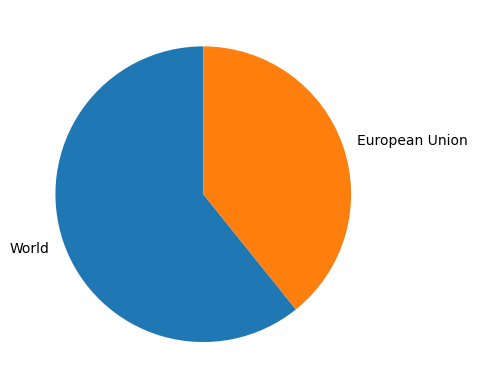

In [67]:
# 1D arrays of labels and values
a_labels = list(athletes.index)
a_values = list([athletes.iloc[0], athletes.iloc[1]]) 

# Plot 1: EU vs World
plt.pie(a_values, labels=a_labels, startangle=90)

([<matplotlib.patches.Wedge at 0x1ca4e70f190>,
 [Text(0.4445165266916953, 1.0061834114603319, ''),
  Text(-1.0960642716894022, -0.09296834044974996, ''),
  Text(0.5279653500307007, -0.9650142947992844, '')])

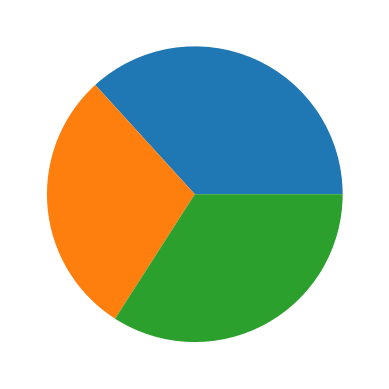

In [49]:
plt.pie(medals_eu["ID"])

# European Union

In [8]:
# EU medals, height, and weight
eu_medals = eu_data.groupby(by="NOC", as_index=False).agg({"Height":"median", "Weight":"median", "Medal":"count"})
#eu_medals

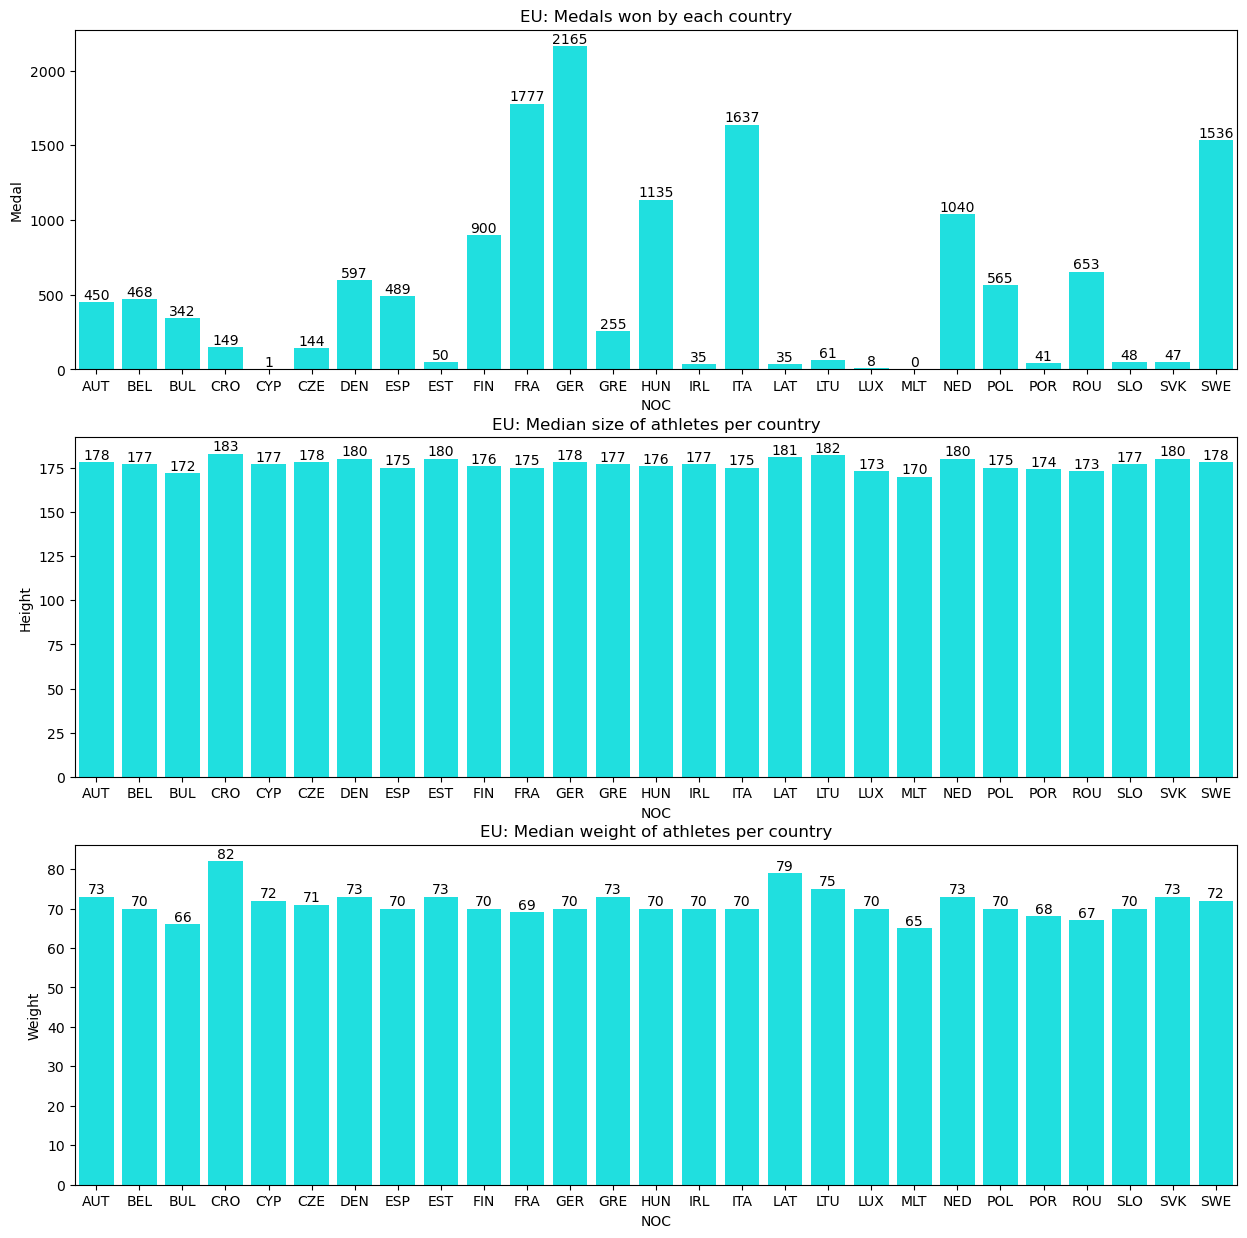

In [18]:
plt.figure(figsize=(15,15))

# 1. Medal count
plt.subplot(3,1,1)
plt.title("EU: Medals won by each country")
mds = sns.barplot(eu_medals, x="NOC", y="Medal", color="cyan")
# get values to appear
for i in mds.containers:
    mds.bar_label(i,)

# 2. Median heights
plt.subplot(3,1,2)
plt.title("EU: Median size of athletes per country")
hgt = sns.barplot(eu_medals, x="NOC", y="Height", color="cyan")

for i in hgt.containers:
    hgt.bar_label(i,)


# 3. Median weights
plt.subplot(3,1,3)
plt.title("EU: Median weight of athletes per country")
wgt = sns.barplot(eu_medals, x="NOC", y="Weight", color="cyan")

for i in wgt.containers:
    wgt.bar_label(i,)
